# LDA

In [1]:
import pickle

with open('data/ai_news.pkl', 'rb') as f:
    ai_news = pickle.load(f)
# ai_news.head()
ai_news = ai_news.drop_duplicates(subset=['sentence']).reset_index(drop=True)
ai_news

/var/folders/4m/shks9p8j0dnbv51nf7cyysfc0000gn/T/ipykernel_65476/3378711327.py:4: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  ai_news = pickle.load(f)


,sentence,hit,anthroscore,doc_id,url,date,category,title,content,words,pos
0,人工智慧是香港科技園公司重點發展的技術領域之一，目前園區有多家研發人工智慧的企業，技術應用範...,人工智慧,-3.371211,0,https://www.ettoday.net/news/20180522/1174798.htm,2018-05-22 17:44:00,大陸,阿里巴巴揪商湯、科技園 投千萬設香港人工智慧實驗室,\n\n大陸中心／綜合報導\n阿里巴巴集團、商湯集團及香港科技園公司21日宣布合作成立「香港...,"[人工, 智慧, 是, 香港, 科技園, 公司, 重點, 發展, 的, 技術, 領域, 之,...","[Na, Na, SHI, Nc, Nc, Nc, Na, VC, DE, Na, Na, ..."
1,林鄭月娥也提到，人工智慧被視為對下一代影響最深遠的科技，今屆政府預留五百億發展創科藍圖中，也...,人工智慧,-0.528870,0,https://www.ettoday.net/news/20180522/1174798.htm,2018-05-22 17:44:00,大陸,阿里巴巴揪商湯、科技園 投千萬設香港人工智慧實驗室,\n\n大陸中心／綜合報導\n阿里巴巴集團、商湯集團及香港科技園公司21日宣布合作成立「香港...,"[林鄭月娥, 也, 提到, ，, 人工, 智慧, 被, 視為, 對, 下, 一, 代, 影響...","[Nb, D, VE, COMMACATEGORY, Na, Na, P, VG, P, N..."
2,自2022年底開始，以ChatGPT為首的生成式AI應運而生，對於商業活動、教育工作乃至於公...,ChatGPT,-1.827064,3,https://finance.ettoday.net/news/2607721,2023-10-28 14:29:00,產經,年度最大AI法律研討會登場 國內外專家7大面向探討監管問題,\n記者蕭文康／綜合報導\n永齡基金會力挺AI法律教育，今年特別與人工智慧法律國際研究基金會...,"[自, 2022年, 底, 開始, ，, 以, Chat, GPT, 為首, 的, 生成式,...","[P, Neu, Ng, VH, COMMACATEGORY, P, FW, FW, VI,..."
3,基於對於AI法律教育的重視，今年永齡基金會亦加入支持，並邀請到全球AI大師：工業大數據專家、...,AI,-1.221877,3,https://finance.ettoday.net/news/2607721,2023-10-28 14:29:00,產經,年度最大AI法律研討會登場 國內外專家7大面向探討監管問題,\n記者蕭文康／綜合報導\n永齡基金會力挺AI法律教育，今年特別與人工智慧法律國際研究基金會...,"[基於, 對於, AI, 法律, 教育, 的, 重視, ，, 今年, 永齡, 基金會, 亦,...","[P, P, FW, Na, Na, DE, VJ, COMMACATEGORY, Nd, ..."
4,李傑表示，由於5G、工業大數據、元宇宙，與人工智慧的發展，未來的產業系統將更多地以高度連接的...,人工智慧,-1.696100,3,https://finance.ettoday.net/news/2607721,2023-10-28 14:29:00,產經,年度最大AI法律研討會登場 國內外專家7大面向探討監管問題,\n記者蕭文康／綜合報導\n永齡基金會力挺AI法律教育，今年特別與人工智慧法律國際研究基金會...,"[李傑, 表示, ，, 由於, 5G, 、, 工業, 大, 數據, 、, 元, 宇宙, ，,...","[Nb, VE, COMMACATEGORY, Cbb, Neu, PAUSECATEGOR..."
...,...,...,...,...,...,...,...,...,...,...,...
8254,在每一集的節目尾聲，她們除各自帶來演出，更合作共演改編版本的《溫柔的生活革命》，陳嫺靜也分享...,A.I.,6.824102,14829,https://star.ettoday.net/news/2271265,2022-06-12 15:43:00,娛樂,被金曲歌王讚：接下來是她的時代！ 女星自揭「私下生活真實面」,\n記者翁子涵／台北報導\n陳嫺靜以充滿特色的聲音與風格活躍在台灣各大音樂祭，2019年曾受...,"[在, 每, 一, 集, 的, 節目, 尾聲, ，, 她們, 除, 各自, 帶來, 演出, ...","[P, Nes, Neu, Nf, DE, Na, Na, COMMACATEGORY, N..."
8255,「另外，同樣在雲林，我們用AI保存霹靂布袋戲的傳統文化。」,AI,-2.664614,14834,https://www.ettoday.net/news/20190629/1478198.htm,2019-06-29 16:37:00,政治,政見會全文／痛心中華民國被折磨 郭台銘：蔡不好吃換郭來煮,\n\n 記者陳家祥／台北報導\n國民黨內初選打得激烈，29日進行第二場「國政願景電視發表會...,"[「, 另外, ，, 同樣, 在, 雲林, ，, 我們, 用, AI, 保存, 霹靂, 布袋...","[PARENTHESISCATEGORY, Cbb, COMMACATEGORY, Dfa,..."
8256,郭台銘說，大家對這個聲音應該很熟悉，其實霹靂所有角色都是由黃文擇副董事長配音，「但剛剛素還真...,AI,4.714407,14834,https://www.ettoday.net/news/20190629/1478198.htm,2019-06-29 16:37:00,政治,政見會全文／痛心中華民國被折磨 郭台銘：蔡不好吃換郭來煮,\n\n 記者陳家祥／台北報導\n國民黨內初選打得激烈，29日進行第二場「國政願景電視發表會...,"[郭台銘, 說, ，, 大家, 對, 這, 個, 聲音, 應該, 很, 熟悉, ，, 其實,...","[Nb, VE, COMMACATEGORY, Nh, P, Nep, Nf, Na, D,..."
8257,在此地圖中，玩家必須收集資源並協助 AI所控制的大天使機甲迎戰聲勢浩大的混源體首領。,AI,0.584078,14851,https://game.ettoday.net/article/1045458.htm,2017-11-04 14:05:00,科技,暴雪嘉年華大放送！《星海爭霸II》即將改為免費遊戲,記者周之鼎／美國安納罕報導\n經過七年的演進，包含多款對戰地圖和合作指揮官的推出，今年的暴雪...,"[在, 此, 地圖, 中, ，, 玩家, 必須, 收集, 資源, 並, 協助, AI, 所...","[P, Nep, Na, Ng, COMMACATEGORY, Na, D, VC, Na,..."


In [4]:
import jieba, os

# load custom user words to keep them intact
if os.path.exists('data/userwords.txt'):
    jieba.load_userdict('data/userwords.txt')

# load stopwords
with open('data/stopwords_zh-tw.txt', 'r', encoding='utf-8') as f:
    stopwords = {w.strip() for w in f if w.strip()}


def tokenize_sentence(s):
    tokens = jieba.lcut(s, cut_all=False)
    return [t for t in tokens if t.strip() and t not in stopwords]

ai_news['tokens'] = ai_news['sentence'].apply(tokenize_sentence)
ai_news[['sentence', 'tokens']].head()

,sentence,tokens
0,人工智慧是香港科技園公司重點發展的技術領域之一，目前園區有多家研發人工智慧的企業，技術應用範...,"[人工智慧, 香港, 科技園, 公司, 重點, 發展, 技術, 領域, 目前, 園區, 多家..."
1,林鄭月娥也提到，人工智慧被視為對下一代影響最深遠的科技，今屆政府預留五百億發展創科藍圖中，也...,"[林, 鄭月, 娥, 提到, 人工智慧, 被視, 下一代, 影響, 最深, 遠, 科技, 今..."
2,自2022年底開始，以ChatGPT為首的生成式AI應運而生，對於商業活動、教育工作乃至於公...,"[2022, 年底, ChatGPT, 為首, 生成式, AI, 應運而生, 商業, 活動,..."
3,基於對於AI法律教育的重視，今年永齡基金會亦加入支持，並邀請到全球AI大師：工業大數據專家、...,"[AI, 法律, 教育, 重視, 今年, 永齡, 基金, 亦, 加入, 支持, 並邀, 請,..."
4,李傑表示，由於5G、工業大數據、元宇宙，與人工智慧的發展，未來的產業系統將更多地以高度連接的...,"[李傑, 表示, 5G, 工業, 大數據, 元, 宇宙, 人工智慧, 發展, 未來, 產業系..."


In [5]:
# Prepare documents for BERTopic (raw sentences + space-joined tokens)

ai_news['tokens_str'] = ai_news['tokens'].apply(lambda toks: ' '.join(toks))

documents_raw = ai_news['sentence'].tolist()  # used for embeddings
documents_tokenized = ai_news['tokens_str'].tolist()  # used by vectorizer (c-TF-IDF)

In [6]:
%pip install gensim
from gensim import corpora
from gensim.models import LdaModel

# Create dictionary and corpus
dictionary = corpora.Dictionary(ai_news['tokens'])
corpus = [dictionary.doc2bow(text) for text in ai_news['tokens']]

# Build LDA model
num_topics = 10
lda_model = LdaModel(corpus=corpus, 
                     id2word=dictionary, 
                     num_topics=num_topics, 
                     random_state=42,
                     passes=10,
                     alpha='auto',
                     per_word_topics=True)

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print(f'Topic {idx}: {topic}')

Note: you may need to restart the kernel to use updated packages.
Topic 0: 0.015*"ChatGPT" + 0.014*"AI" + 0.012*"人" + 0.012*"網友" + 0.009*"真的" + 0.008*"影片" + 0.007*"後" + 0.007*"日" + 0.007*"照片" + 0.005*"月"
Topic 1: 0.029*"AMD" + 0.020*"台股" + 0.011*"玩家" + 0.009*"遊戲" + 0.007*"檢查" + 0.006*"情人" + 0.006*"字幕" + 0.006*"當成" + 0.005*"墨西哥" + 0.004*"索妮雅"
Topic 2: 0.040*"AI" + 0.018*"台灣" + 0.012*"發展" + 0.011*"未來" + 0.011*"科技" + 0.010*"產業" + 0.009*"黃" + 0.008*"表示" + 0.008*"說" + 0.006*"人工智慧"
Topic 3: 0.069*"AI" + 0.008*"人工智慧" + 0.007*"中" + 0.006*"後" + 0.006*"應用" + 0.006*"製" + 0.006*"透過" + 0.006*"人" + 0.005*"年" + 0.005*"機器"
Topic 4: 0.016*"智慧" + 0.013*"人工智慧" + 0.009*"應用" + 0.008*"技術" + 0.008*"醫療" + 0.007*"AI" + 0.007*"發展" + 0.006*"提供" + 0.006*"平台" + 0.006*"合作"
Topic 5: 0.010*"兆" + 0.006*"配音" + 0.005*"夢" + 0.005*"成品" + 0.005*"感情" + 0.004*"選舉" + 0.004*"筆電" + 0.004*"中文" + 0.004*"翻譯" + 0.004*"協會"
Topic 6: 0.009*"PO" + 0.007*"歌曲" + 0.007*"賺" + 0.007*"北流" + 0.006*"強勁" + 0.005*"活動" + 0.005*"Tesla" + 0.005*"涉及

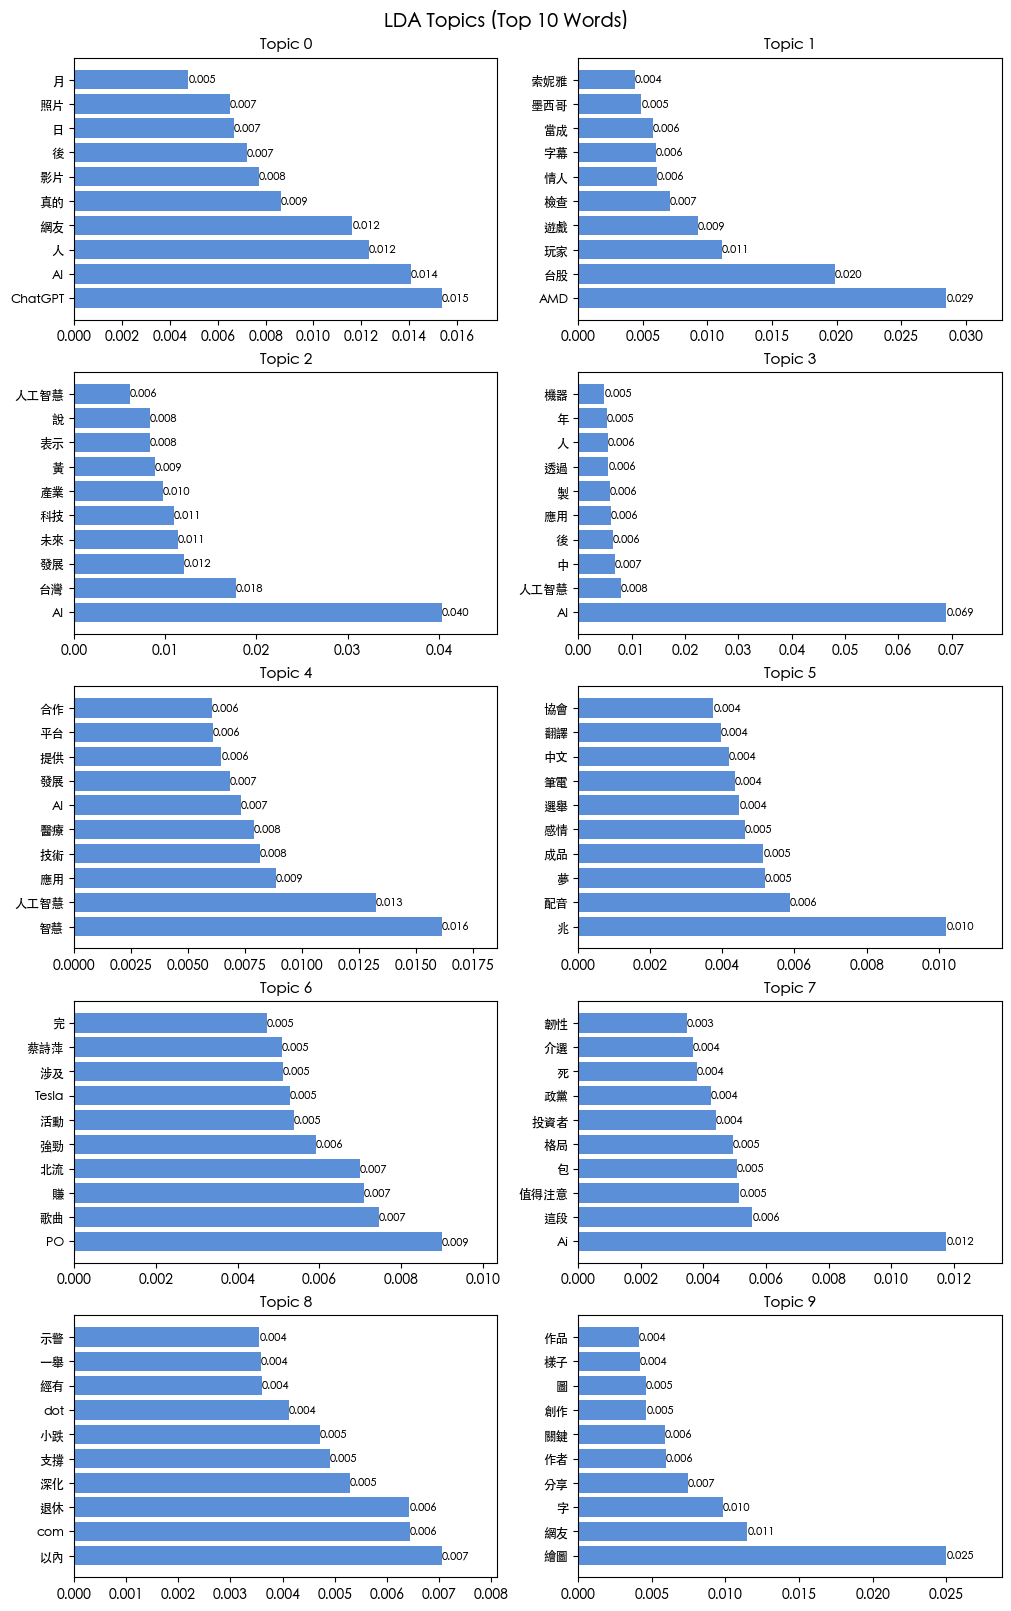

In [6]:
import math
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set Chinese font (Heiti TC Light) if available
font_name = 'Heiti TC'
if font_name in [f.name for f in font_manager.fontManager.ttflist]:
    plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False  # ensure minus sign renders

# Get topics as list of (topic_id, [(word, weight), ...])
topics = lda_model.show_topics(num_topics=-1, num_words=10, formatted=False)

n_topics = len(topics)
cols = 2
rows = math.ceil(n_topics / cols)

fig, axes = plt.subplots(rows, cols, figsize=(10, 3.2 * rows), constrained_layout=True)
if rows == 1:
    axes = [axes]
axes = axes.flatten()

for ax, (tid, word_weights) in zip(axes, topics):
    words = [w for w, _ in word_weights][::-1]
    weights = [float(wt) for _, wt in word_weights][::-1]
    ax.barh(range(len(words)), weights, color='#5b8fd7')
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words, fontsize=9)
    ax.set_title(f'Topic {tid}', fontsize=11)
    ax.set_xlim(0, max(weights)*1.15)
    for i, v in enumerate(weights):
        ax.text(v, i, f'{v:.3f}', va='center', ha='left', fontsize=8)
    ax.invert_yaxis()

for j in range(len(topics), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('LDA Topics (Top 10 Words)', fontsize=14)
plt.show()

# BERTopic

In [7]:
# Compute sentence embeddings for raw sentences
%pip install sentence-transformers

from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
embeddings = embedder.encode(
    documents_raw,
    show_progress_bar=True,
    convert_to_numpy=True,
    normalize_embeddings=True
)

len(embeddings), embeddings.shape

Note: you may need to restart the kernel to use updated packages.


/Users/jirlong/anaconda3/envs/tm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 259/259 [00:17<00:00, 15.09it/s]


(8259, (8259, 384))

In [8]:
documents_tokenized

['人工智慧 香港 科技園 公司 重點 發展 技術 領域 目前 園區 多家 研發 人工智慧 企業 技術 應用 範圍 廣泛 包括 智慧 安保 醫療 科技 客服 機器 人 金融 科技 智慧 物流 供 應鏈',
 '林 鄭月 娥 提到 人工智慧 被視 下一代 影響 最深 遠 科技 今屆 政府 預留 五百 億發展 創科 藍圖 中 包括 人工智慧 機械人 發展 平台 事 人工智慧 研發 非 牟利 機構 平台 上營運 研發 中心 實驗室 提供 資本 營運 研發 開支 支援 希望 吸引 世界 頂級 科研 機構 企業 港 本地 大學及 科研 機構 合作 進行 研發 項目',
 '2022 年底 ChatGPT 為首 生成式 AI 應運而生 商業 活動 教育 工作 公部門 影響 其相關 法律 監管 問題 亟待 解決',
 'AI 法律 教育 重視 今年 永齡 基金 亦 加入 支持 並邀 請 全球 AI 大師 工業 大數據 專家 馬 里 蘭大學 講座 教授 暨 工業 人工智慧 中心 主任 李傑 分享 AI 最新 發展 產業 應用',
 '李傑 表示 5G 工業 大數據 元 宇宙 人工智慧 發展 未來 產業系 統將 高度 連接 方式 進行 運作',
 '期待 利用 人工智慧 系 統性 思維來 解決 應 這種 高度 網路化 高度 分散式 製 造 系 統 方法 有效 辨識 預測 預防風險 問題',
 'AI 語音 功能 Google Assistant 智慧 語音 助理 結合 將會 提供 用戶 透過 語音 指令 運行 應用 程序 貨 更改 設置 相關 語音 指令 配置 參照 前篇 報導 LG 將在 MWC V30 2018 展示 Vision AI 手機 購物 拍照 更聰明',
 '安聯 環球 投資 資深 研究 分析 師周 如興 Stephen Jue 表示 目前 企業 AI 營收 貢獻 占 高 最多約 10% 未來 三到 五年 AI 關鍵 年 預料 企業 將會 三到 五年 間 擴大 AI 資本 支出 這也 將會 成為 安聯 投信 瞄準 投資 機會',
 '基礎 建設 產業 包括 半導體 關鍵 零組件 輝達 NVidia 屬於長 線 需求 這類 約 占 基金 整體 投資 38 40% 應用 程式 部分 提供 開發 銷售 營運 商用 數據 服務 公司 涉入 產業 方面 更廣 通訊 服務 非核心

In [9]:
# Fit BERTopic with best-practice components for Chinese
%pip install bertopic

from bertopic import BERTopic
from umap import UMAP
import hdbscan
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Vectorizer: split on spaces (since we pre-tokenized) and include bigrams
vectorizer_model = CountVectorizer(
    tokenizer=str.split,
    token_pattern=None,      # required when supplying a tokenizer
    ngram_range=(1, 2),
    min_df=2,
    stop_words=list(stopwords) if isinstance(stopwords, (set, list)) else None
)

# UMAP reduces dimensionality for HDBSCAN clustering
umap_model = UMAP(
    n_neighbors=15,
    n_components=5,
    min_dist=0.0,
    metric='cosine',
    random_state=42
)

# HDBSCAN on UMAP space (euclidean after UMAP is recommended)
hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=15,
    min_samples=5,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

# Create and fit the BERTopic model
topic_model = BERTopic(
    language="chinese (traditional)",
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    # vectorizer_model=vectorizer_model,
    calculate_probabilities=True,
    verbose=True,
    low_memory=True,
    top_n_words=10,
    min_topic_size=15
)

topics, probs = topic_model.fit_transform(documents_tokenized, embeddings)

# Attach results to dataframe
ai_news['topic'] = topics
ai_news['topic_prob'] = np.max(probs, axis=1) if probs is not None else np.nan

# Show topic summary
topic_model.get_topic_info().head(15)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


2025-12-01 09:50:01,919 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
2025-12-01 09:50:19,544 - BERTopic - Dimensionality - Completed ✓
2025-12-01 09:50:19,545 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-12-01 09:50:20,952 - BERTopic - Cluster - Completed ✓
2025-12-01 09:50:20,954 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-12-01 09:50:21,090 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,2877,-1_ai_人工智慧_發展_未來,"[ai, 人工智慧, 發展, 未來, 表示, 技術, 機器, 科技, 應用, 產業]",[AI 定義 陳 昇 瑋 指出 廣為 人知 AI 指 機器 擁有 人類 智慧 智慧 定義 人...
1,0,723,0_chatgpt_聊天_使用_openai,"[chatgpt, 聊天, 使用, openai, gpt, 回答, 內容, 使用者, 學生...",[陳 文章 指出 ChatGPT 學生 獲取 新知 識 一個 好 工具 善用 ChatGPT...
2,1,380,1_醫療_醫師_醫院_診斷,"[醫療, 醫師, 醫院, 診斷, 健康, 醫學, 判讀, 病人, 治療, 照護]",[三軍總醫院 院長 蔡建松 表示 現代化 醫院 已經 運用 大數據 人工智慧 及物 聯網 提...
3,2,343,2_學生_教育_課程_學習,"[學生, 教育, 課程, 學習, 大學, 老師, 教授, ai, 領域, 人工智慧]",[面對 生成式 AI 熱潮 張國恩 表示 東 海大 學 共通 必修 中文 課程 進行 改革 ...
4,3,225,3_換臉_照片_網友_影片,"[換臉, 照片, 網友, 影片, 繪圖, 美女, ai, 粉絲, 合成, 分享]",[美女 網紅 CEO 夏筠婷 近日 AI 技術 變臉 製 作成 雅 影片 流出 已 請律師 ...
5,4,224,4_三星_理器_晶片_運算,"[三星, 理器, 晶片, 運算, intel, ai, 手機, pc, 產品, 高通]",[採用 Qualcomm Hexagon 685 DSP 架構 透過 強化 GPU CPU ...
6,5,199,5_台灣_產業_發展_半導,"[台灣, 產業, 發展, 半導, 轉型, 科技, 人工智慧, 中心, 全球, 半導體]",[第二 人工智慧 產業 賴清德 透露 人工智慧 未來 必然 改變 全球 生活 最 重要 科技...
7,6,173,6_股價_股票_台股_股市,"[股價, 股票, 台股, 股市, 投資人, 市場, 趨勢, 輝達, 下跌, etf]",[謝文雄 指出 AI 長 線 看好 不變 目前 AI 發展 初期 今年 市場 投資 機會 資...
8,7,160,7_google_功能_pixel_android,"[google, 功能, pixel, android, cloud, 地圖, 學習, 應用...",[Google I O 2017 期間 Google 世人 展示 Google Assist...
9,8,144,8_取代_工作_就業_失業,"[取代, 工作, 就業, 失業, 人力, 機會, 人類, 萬個, 工人, 自動化]",[面對 人工智慧 取代 智慧 工人 李開 復 認為 唯有 人機 協作 關愛型 工作 角度 調...


In [10]:
# Interactive visualizations (Plotly)

fig_topics = topic_model.visualize_topics()
fig_topics.show()

fig_bars = topic_model.visualize_barchart(top_n_topics=12)
fig_bars.show()

fig_hier = topic_model.visualize_hierarchy()
fig_hier.show()

fig_heat = topic_model.visualize_heatmap()
fig_heat.show()

In [11]:
# Persist model and exports

import pandas as pd

# Save BERTopic model
model_path = "bertopic_model"
topic_model.save(model_path)
print(f"Model saved to {model_path}")

# Export topic info and enriched dataframe
topic_info = topic_model.get_topic_info()
ai_news.to_csv("ai_news_topics.csv", index=False)
topic_info.to_csv("bertopic_topic_info.csv", index=False)
print("Saved ai_news_topics.csv and bertopic_topic_info.csv")

# Quick preview
ai_news[['sentence','topic','topic_prob']].head()

2025-12-01 09:50:24,379 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


Model saved to bertopic_model
Saved ai_news_topics.csv and bertopic_topic_info.csv


,sentence,topic,topic_prob
0,人工智慧是香港科技園公司重點發展的技術領域之一，目前園區有多家研發人工智慧的企業，技術應用範...,-1,0.057583
1,林鄭月娥也提到，人工智慧被視為對下一代影響最深遠的科技，今屆政府預留五百億發展創科藍圖中，也...,-1,0.014367
2,自2022年底開始，以ChatGPT為首的生成式AI應運而生，對於商業活動、教育工作乃至於公...,0,0.299131
3,基於對於AI法律教育的重視，今年永齡基金會亦加入支持，並邀請到全球AI大師：工業大數據專家、...,2,0.212974
4,李傑表示，由於5G、工業大數據、元宇宙，與人工智慧的發展，未來的產業系統將更多地以高度連接的...,20,1.000000
